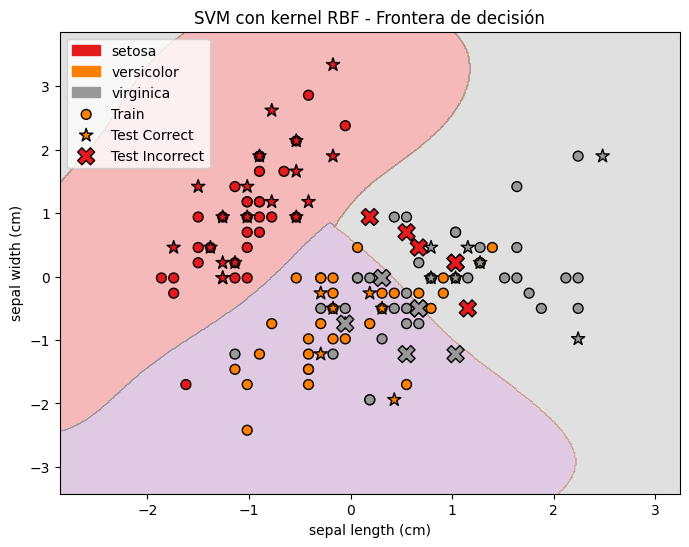

Accuracy: 0.7333333333333333


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar dataset Iris
iris = load_iris()
X = iris.data[:, :2]  # Solo las 2 primeras características para graficar
y = iris.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar SVM con kernel RBF
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)

# =========================
# Graficar frontera de decisión
# =========================
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

# Puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50,
            cmap=plt.cm.Set1, edgecolors='k', label="Train")

# Puntos de prueba correctos
correct = y_test == y_pred
plt.scatter(X_test[correct, 0], X_test[correct, 1], c=y_test[correct], s=100,
            marker='*', cmap=plt.cm.Set1, edgecolors='k', label="Test Correct")

# Puntos de prueba mal clasificados
incorrect = y_test != y_pred
plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], c=y_test[incorrect], s=150,
            marker='X', cmap=plt.cm.Set1, edgecolors='k', label="Test Incorrect")

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("SVM con kernel RBF - Frontera de decisión")

# Crear leyenda personalizada con colores de clases
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=plt.cm.Set1(i/2), label=name) for i, name in enumerate(iris.target_names)]
plt.legend(handles=patches + plt.gca().get_legend_handles_labels()[0])

plt.show()

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
